## Import CSV

In [18]:
import pandas
def read_csv(filename,folder):
    folder=folder+"/"+filename+".csv"
    return pandas.read_csv(folder,encoding='ISO-8859-1')

In [19]:
folder="/workspace/200g/"
data=read_csv(filename="2019_BIG_DATA",folder=folder)
data = data.fillna(method='ffill')
data.head()

,A,B,C,D,E
0,41.64,11.12,27.25,26.46,59.07
1,41.51,11.02,27.58,26.79,58.71
2,41.51,11.02,27.58,26.79,58.71
3,42.22,11.21,27.47,26.93,59.07
4,42.98,11.31,27.25,26.75,60.38


## Visualize Data

In [20]:
from matplotlib import pyplot
def plot_data(dataset,groups):
    i = 1
    pyplot.figure()
    values = dataset.values
    for group in groups:
    	pyplot.subplot(len(groups), 1, i)
    	pyplot.plot(values[:, group])
    	pyplot.title(dataset.columns[group], y=0.5, loc='right')
    	i += 1
    pyplot.show()

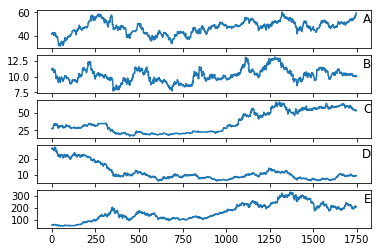

In [21]:
plot_data(data,groups=list(range(0,5)))

## Convert to Return

In [22]:
data = data.pct_change().dropna()
data.head()

,A,B,C,D,E
1,-0.003122,-0.008993,0.012110,0.012472,-0.006094
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.017104,0.017241,-0.003988,0.005226,0.006132
4,0.018001,0.008921,-0.008009,-0.006684,0.022177
5,-0.005817,-0.008842,0.000000,-0.019065,-0.018052


## Data Summary

In [23]:
data.describe()

,A,B,C,D,E
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.000328,0.000082,0.000565,-0.000306,0.001055
std,0.015697,0.016578,0.019135,0.023471,0.025897
min,-0.071413,-0.068852,-0.069928,-0.070698,-0.099603
25%,-0.008111,-0.008946,-0.008460,-0.014617,-0.012753
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.008883,0.008247,0.007327,0.012178,0.014187
max,0.069439,0.090452,0.100103,0.098966,0.097367


## Rolling Mean

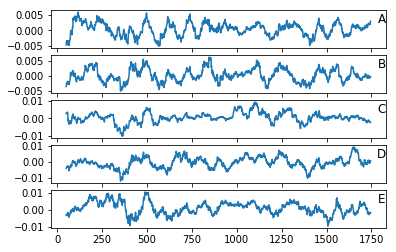

In [24]:
plot_data(data.rolling(50).mean(),groups=list(range(0,5)))

## Rolling Std

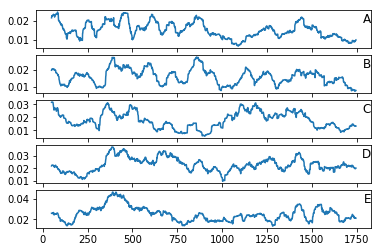

In [25]:
plot_data(data.rolling(50).std(),groups=list(range(0,5)))

## Rolling Z-Score

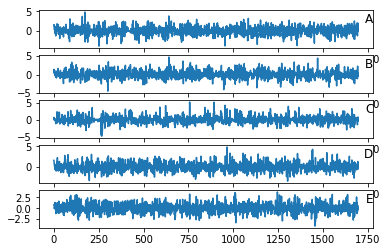

In [26]:
z_score = (data - data.rolling(50).mean())/data.rolling(50).std()
z_score = z_score.dropna()
plot_data(z_score,groups=list(range(0,5)))

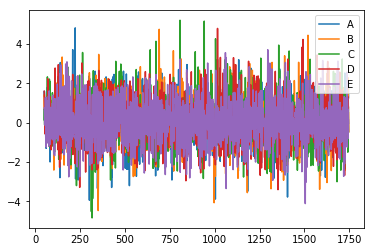

In [27]:
z_score.plot(kind="line")

In [28]:
z_score.describe()

,A,B,C,D,E
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,-0.001947,-0.000751,-0.004694,-0.002428,0.002239
std,0.998999,0.997840,0.991769,0.996825,0.997877
min,-3.937572,-4.463969,-4.838958,-3.403389,-4.110463
25%,-0.581468,-0.593843,-0.494632,-0.614392,-0.590726
50%,-0.008504,-0.036828,-0.040832,-0.001873,-0.028932
75%,0.593012,0.522993,0.404709,0.531625,0.576490
max,4.821166,4.748412,5.209304,4.793726,3.709273


## Independent and identically distributed (I.I.D.) Testing

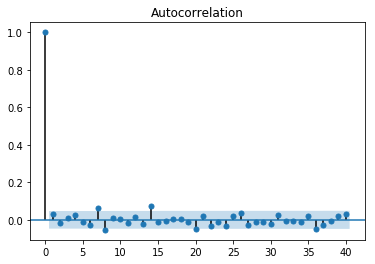

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(data['A'].values, lags=40)
plt.show()

## Histogram

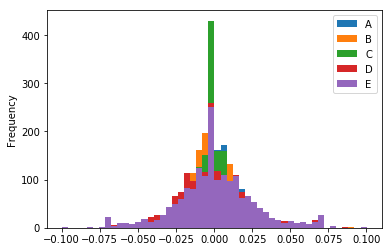

In [30]:
data.plot(kind="hist",bins=50)

## Normal Test 

In [31]:
from scipy import stats
print(stats.shapiro(data['A'].values))
print(stats.shapiro(data['B'].values))
print(stats.shapiro(data['C'].values))
print(stats.shapiro(data['D'].values))
print(stats.shapiro(data['E'].values))

(0.9745582938194275, 4.776595475345841e-17)
(0.9621728658676147, 6.1494141544969275e-21)
(0.917795717716217, 8.367549461243613e-30)
(0.976643443107605, 2.8921341766979087e-16)
(0.9779636263847351, 9.59150251559379e-16)


## *** LSTM ***

In [32]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def Standard_MinMax(data):
    sc = MinMaxScaler(feature_range = (0, 1))
    return sc.fit_transform(data.reshape(-1,1))

In [33]:
data=read_csv(filename="2019_BIG_DATA",folder=folder)
data = data.fillna(method='ffill')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
scaled

array([[0.35085875, 0.63857678, 0.21913079, 0.95226954, 0.03615489],
       [0.34630214, 0.61985019, 0.22583266, 0.96771175, 0.03487128],
       [0.34630214, 0.61985019, 0.22583266, 0.96771175, 0.03487128],
       ...,
       [0.90290922, 0.44756554, 0.74715678, 0.15956949, 0.5664979 ],
       [0.94672275, 0.45505618, 0.75649878, 0.16705662, 0.56806675],
       [0.978619  , 0.44756554, 0.74715678, 0.16331306, 0.5664979 ]])

## Series to Supervised

In [34]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [35]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.350859,0.638577,0.219131,0.952270,0.036155,0.346302,0.619850,0.225833,0.967712,0.034871
2,0.346302,0.619850,0.225833,0.967712,0.034871,0.346302,0.619850,0.225833,0.967712,0.034871
3,0.346302,0.619850,0.225833,0.967712,0.034871,0.371188,0.655431,0.223599,0.974263,0.036155
4,0.371188,0.655431,0.223599,0.974263,0.036155,0.397827,0.674157,0.219131,0.965840,0.040826
5,0.397827,0.674157,0.219131,0.965840,0.040826,0.389064,0.655431,0.219131,0.941975,0.036939


In [36]:
pred = {'A': 5, 'B': 6, 'C': 7, 'D': 8, 'E': 9}
reframed = pandas.concat([reframed.iloc[:,0:5],reframed.iloc[:,pred['A']]],axis=1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
1,0.350859,0.638577,0.219131,0.952270,0.036155,0.346302
2,0.346302,0.619850,0.225833,0.967712,0.034871,0.346302
3,0.346302,0.619850,0.225833,0.967712,0.034871,0.371188
4,0.371188,0.655431,0.223599,0.974263,0.036155,0.397827
5,0.397827,0.674157,0.219131,0.965840,0.040826,0.389064


## Data Split

In [37]:
train = reframed.values[:350,:]
test = reframed.values[350:400,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((350, 5), (350,), (50, 5), (50,))

## LSTM

In [38]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                11200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


## Training

In [39]:
history = model.fit(train_X, train_y, epochs=500, 
                    batch_size=72, validation_data=(test_X, test_y), 
                    verbose=0, shuffle=False)

W0113 05:42:26.405930 139814852540224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



## Plot Loss Curve

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


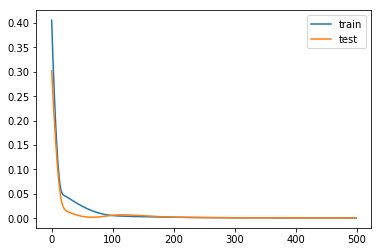

In [40]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Model Predict

In [41]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
yhat.shape, test_X.shape

((50, 1), (50, 5))

## Invert scaling for forecast

In [42]:
pred = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
inv_yhat = concatenate((yhat, numpy.delete(test_X, pred['A'], axis=1)), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(50,)

## Invert scaling for actual

In [43]:
real = test_y.reshape((len(test_y), 1))
inv_y = concatenate((real, numpy.delete(test_X, pred['A'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(50,)

## RMSE

In [44]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.862


## Predict vs Real

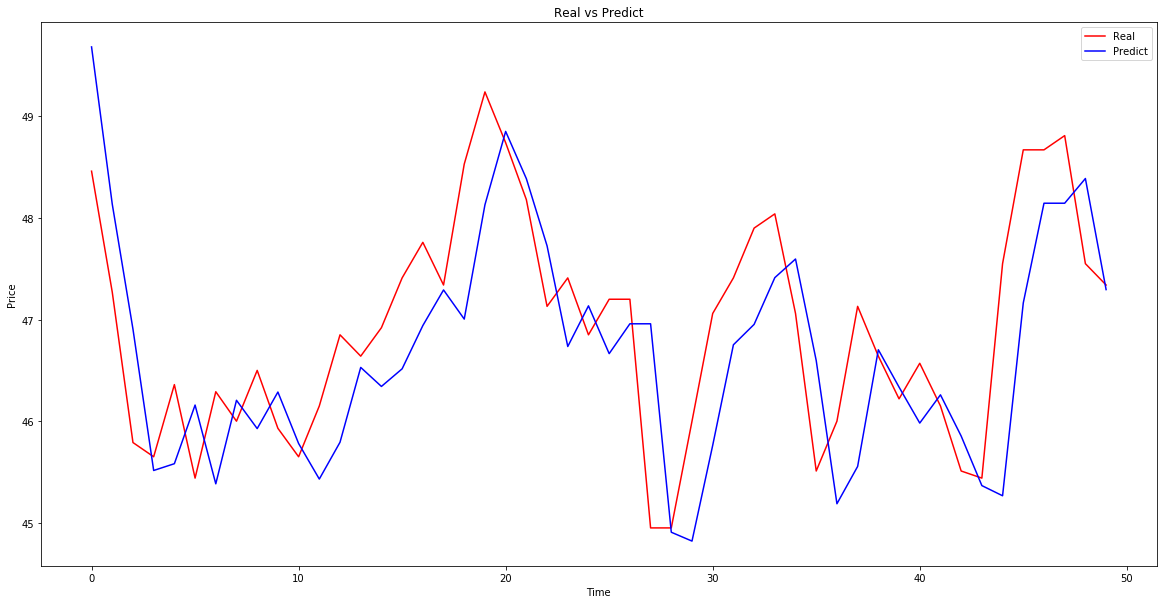

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Convert Daily Return 

In [46]:
res = pandas.DataFrame({'real': inv_y, 'pred': inv_yhat})
res = res.pct_change()
res.head()

,real,pred
0,NaN,NaN
1,-0.024556,-0.031137
2,-0.031309,-0.025551
3,-0.003057,-0.029653
4,0.015553,0.001466


## Predict Return vs Real Return

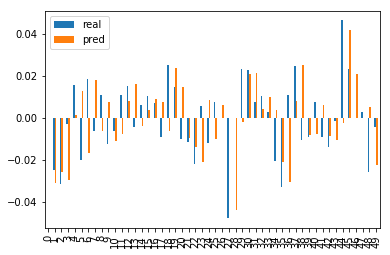

In [47]:
res.plot(kind = 'bar')

## Convert to Z-score

In [48]:
res=(res-res.mean())/res.std()
res['real.c'] = np.where(res['real']>1, 1, 
                np.where(res['real']<-1, -1, 0))
res['pred.c'] = np.where(res['pred']>1, 1, 
                np.where(res['pred']<-1, -1, 0))
sum(res['real.c']==res['pred.c'])/50

0.6

## *** SVM Classification ***

In [49]:
folder="/workspace/200g/"
A=read_csv(filename="A",folder=folder)

## Tidy Data

In [50]:
import numpy
y = A['PRICE']
x = A[A.columns[numpy.where(A.isna().sum()==0)]]
x = x.fillna(method='ffill')
y = y.fillna(method='ffill')
x.head()

,MARKET VALUE,DIVIDEND YIELD,PER,PRICE INDEX,12M FWD DIVIDEND YIELD (%),12 MONTH FORWARD EARN. YIELD,CURRENT EV / 12M FWD EBIT,CURRENT EV / 12M FWD EBITDA,CURRENT EV / 12M FWD SALES,12M FWD NET DEBT / EBITDA,...,PLASTICPRETAX INCOME,PLASTICINCOME TAXES,PLASTICNET INC BEFORE EXTRA/PFD DIVS,PLASTICPREFERRED DIVIDEND REQUIREMENT,PLASTICDIVIDENDS PROVIDED/PAID-COMMON,PLASTICEARNINGS BEF INTEREST & TAXES,PLASTICEBIT & DEPRECIATION,PLASTICNET INCOMEBASIC,PLASTICFY1 EPS MEAN EST,PLASTICFY2 EPS MEAN EST
0,512754.9,1.19,31.3,768.2,4.537,5.932,24.433,19.443,3.065,2.175,...,50161168,8443464,40973797,0,36904944,51996544,68509249,40973797,2.13,3.67
1,511184.5,1.19,31.2,765.9,4.537,5.932,24.364,19.387,3.057,2.175,...,50161168,8443464,40973797,0,36904944,51996544,68509249,40973797,2.13,3.67
2,511184.5,1.19,31.2,765.9,4.537,5.932,24.364,19.387,3.057,2.175,...,50161168,8443464,40973797,0,36904944,51996544,68509249,40973797,2.13,3.67
3,519822.1,1.17,31.7,778.8,4.537,5.932,24.746,19.691,3.105,2.175,...,50161168,8443464,40973797,0,36904944,51996544,68509249,40973797,2.13,3.67
4,529244.8,1.15,32.3,792.9,4.537,5.932,25.163,20.023,3.157,2.175,...,50161168,8443464,40973797,0,36904944,51996544,68509249,40973797,2.13,3.67


## Data convert to Relative Change

In [51]:
x = x.pct_change()
x = x.dropna(axis=1, how='all')
y = y.pct_change()
y =(y-y.mean())/y.std()

In [52]:
x.shape, y.shape

((1747, 73), (1747,))

## Subset Key Features

In [53]:
x['idx.r'] = x['PRICE INDEX']
x['div.r'] = x['DIVIDEND YIELD']
x = x[['idx.r','div.r']].dropna()
y = y.dropna()

## Y convert to Category

In [54]:
y = numpy.where(y>1, 1, numpy.where(y<-1, -1, 0))

In [55]:
from sklearn.model_selection     import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42 )

## Standardize Function

In [56]:
from sklearn.preprocessing       import StandardScaler
def Standard(data):
    sc = StandardScaler()
    # fit_transform will fixed mean & vol by data
    # transform reuse above mean & vol
    return sc.fit_transform(data)

In [57]:
x = Standard(x)
x.shape

(1746, 2)

## SVM Classifier

In [58]:
def plot_classifier(data,target,type,C=100,svc_kernel="rbf"):
    if type == 'SVC':
        from sklearn.svm import SVC
        clf = SVC(C=C,kernel=svc_kernel)
        clf.fit(data, target)
    if type == 'Logistic':
        from sklearn.linear_model import LogisticRegression
        clf = LogisticRegression()
        clf.fit(data, target)
    plot_estimator(estimator=clf, data=data ,target=target)
    
def plot_estimator(estimator, data, target):
    # *** estimator model must trained by two variables ***
    x_min, x_max = data[:, 0].min() - 0.02, data[:, 0].max() + 0.02
    y_min, y_max = data[:, 1].min() - 0.02, data[:, 1].max() + 0.02
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.005), numpy.arange(y_min, y_max, 0.005))
    Z = estimator.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap = plt.cm.brg)
    plt.xlabel('Index Return')
    plt.ylabel('Dividend Growth')
    plt.show()

## Plot Decision Boundary

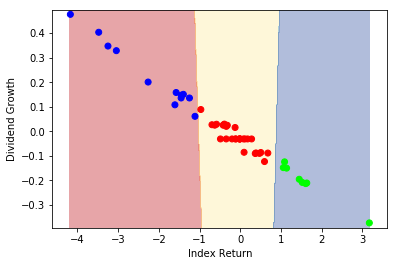

In [59]:
plot_classifier(data=x[0:50,:],target=y[0:50],type="SVC",svc_kernel="linear",C=100)

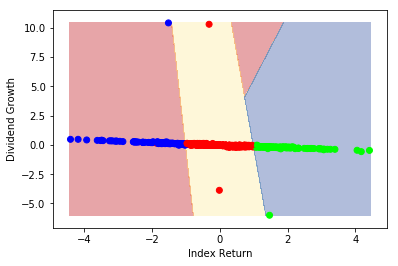

In [60]:
plot_classifier(data=x[:1000,:],target=y[:1000],type="SVC",svc_kernel="linear",C=100)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


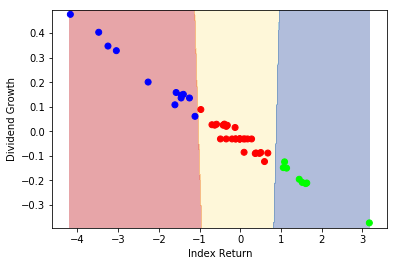

In [61]:
plot_classifier(data=x[:50,:],target=y[:50],type="SVC",svc_kernel="rbf",C=1000)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


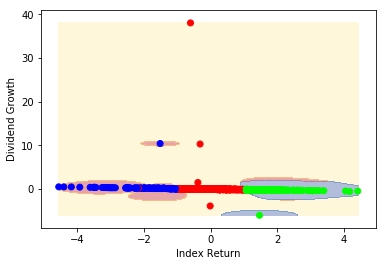

In [62]:
plot_classifier(data=x[:1500,:],target=y[:1500],type="SVC",svc_kernel="rbf",C=1000)

## Validate Model

In [63]:
folder="/workspace/200g/"
A_50=read_csv(filename="A_50",folder=folder)
A_50.head()

,PRICE,MARKET VALUE,DIVIDEND YIELD,PER,PRICE INDEX,12M FWD DIVIDEND YIELD (%),12 MONTH FORWARD EARN. YIELD,CURRENT EV / 12M FWD EBIT,CURRENT EV / 12M FWD EBITDA,CURRENT EV / 12M FWD SALES,...,PLASTICNET INC BEFORE EXTRA/PFD DIVS,PLASTICPREFERRED DIVIDEND REQUIREMENT,PLASTICDIVIDENDS PROVIDED/PAID-COMMON,PLASTICEARNINGS BEF INTEREST & TAXES,PLASTICEBIT & DEPRECIATION,PLASTICNET INCOMEBASIC,#ERROR.13,PLASTICEMPLOYEES,PLASTICFY1 EPS MEAN EST,PLASTICFY2 EPS MEAN EST
0,71.61,606707.6,6.67,9.4,909.0,6.351,9.067,22.379,13.416,1.821,...,52746021,0,39654108,63248655,79434369,52746021,NaN,NaN,7.34,6.91
1,NaN,605914.4,6.68,9.4,907.8,6.351,9.067,22.350,13.399,1.819,...,52746021,0,39654108,63248655,79434369,52746021,NaN,NaN,7.34,6.91
2,NaN,596397.5,6.78,9.2,893.5,6.351,9.067,22.009,13.195,1.791,...,52746021,0,39654108,63248655,79434369,52746021,NaN,NaN,7.34,6.91
3,NaN,597983.6,6.76,9.2,895.9,6.351,9.067,22.066,13.229,1.796,...,52746021,0,39654108,63248655,79434369,52746021,NaN,NaN,7.34,6.91
4,NaN,586880.6,6.89,9.1,879.3,6.351,9.067,21.669,12.991,1.763,...,52746021,0,39654108,63248655,79434369,52746021,NaN,NaN,7.34,6.91


## Define Import Data

In [64]:
def read_data(name):
    folder="/workspace/200g/"
    data = read_csv(filename=name,folder=folder)
    y = data['PRICE']
    x = data[data.columns[numpy.where(data.isna().sum()==0)]]
    x = x.fillna(method='ffill')
    y = y.fillna(method='ffill')
    # Price Chg.
    x = x.pct_change()
    x = x.dropna(axis=1, how='all')
    y = y.pct_change()
    y =(y-y.mean())/y.std()
    x['idx.r'] = x['PRICE INDEX']
    x['div.r'] = x['DIVIDEND YIELD']
    x = x[['idx.r','div.r']].dropna()
    y = y.dropna()
    #y = numpy.where(y>1, 1, numpy.where(y<-1, -1, 0))
    return x, y

def get_ret_y(name):
    folder="/workspace/200g/"
    data = read_csv(filename=name,folder=folder)
    y = data['PRICE']
    y = y.fillna(method='ffill')
    # Price Chg.
    y = y.pct_change()
    y = y.dropna()
    return y

In [65]:
x, y = read_data(name="A")
x_t, y_t = read_data(name="A_T")
x.shape, y.shape, x_t.shape, y_t.shape

((1746, 2), (1746,), (484, 2), (484,))

In [66]:
x = Standard(pandas.concat([x,x_t],axis=0))
y = numpy.concatenate((y,y_t),axis=0)
x.shape, y.shape

((2230, 2), (2230,))

## SVM Regression Model

In [67]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=1000, gamma='auto')
svr_poly = SVR(kernel='poly', C=1000, gamma='auto', degree=3, epsilon=.1,coef0=1)

svr_rbf.fit(x,y)
svr_lin.fit(x,y)
pred_rbf = svr_rbf.predict(x)
pred_lin = svr_lin.predict(x)

print("MSE (rbf):",mean_squared_error(y,pred_rbf))
print("MSE (lin):",mean_squared_error(y,pred_lin))

MSE (rbf): 0.0630758166980691
MSE (lin): 0.06643769804103944


In [68]:
pred_y = numpy.where(pred_rbf>1, 1, numpy.where(pred_rbf<-1, -1, 0))
real_y = numpy.where(y>1, 1, numpy.where(y<-1, -1, 0))
sum(pred_y==real_y)/size(pred_y)

0.9354260089686098

In [69]:
x_50, y_50 = read_data(name="A_50")
x_50 = Standard(x_50)
pred = svr_rbf.predict(x_50)
pred_c = numpy.where(pred>1, 1, numpy.where(pred<-1, -1, 0))

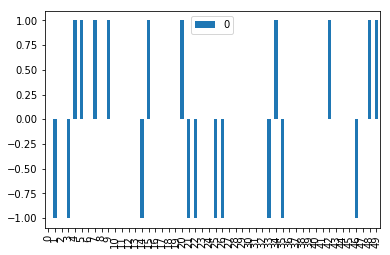

In [70]:
pandas.DataFrame(pred_c).plot(kind='bar')

In [74]:
av = -0.000197743967340514
sd = 0.00941271390017523
res = pandas.concat([pandas.DataFrame(pred),pandas.DataFrame(pred_c),pandas.DataFrame((pred-pred.mean())/pred.std()*sd+av)],axis=1)

In [75]:
res.to_csv("A_output.csv")